
### WQD7005 - Data Mining

Continuous Assessment

Milestone 4

Matrix Number : 17201091/1

Name : LIU,HONGYANG


In [1]:
# import libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import data sets
oldPrice=pd.read_csv("cleanOilRate.csv")
AmericaGdp=pd.read_csv("year_csv.csv")

In [3]:
#view oilRate
oldPrice.head()

,Year,Price(USD),Open(USD),High(USD),Low(USD),Close(USD),Change %
0,2020,50.73,61.18,63.27,28.93,28.93,-52.62
1,2019,57.05,46.54,66.30,46.54,61.06,34.46
2,2018,64.90,60.37,76.41,42.53,45.41,-24.84
3,2017,50.84,52.33,60.42,42.53,60.42,12.47
4,2016,43.58,36.76,54.06,26.21,53.72,45.03


In [4]:
#view year_gdp
AmericaGdp=AmericaGdp.rename(columns={'date':'Year'})
AmericaGdp.head()

,Year,level-current,level-chained,change-current,change-chained
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


In [5]:
#merge two data sources: oldPrice and American GDP, using Year value
integration=pd.merge(oldPrice,AmericaGdp,on='Year')
integration.head()

,Year,Price(USD),Open(USD),High(USD),Low(USD),Close(USD),Change %,level-current,level-chained,change-current,change-chained
0,2015,48.72,52.72,61.43,34.73,37.04,-30.70,18120.7,16471.5,2.8,1.5
1,2014,93.17,95.14,107.95,53.45,53.45,-45.55,17427.6,16013.3,4.0,2.9
2,2013,97.98,93.14,110.62,86.65,98.17,6.90,16691.5,15612.2,4.4,2.6
3,2012,94.05,102.96,109.39,77.72,91.83,-7.08,16155.3,15354.6,3.3,1.7
4,2011,94.88,91.59,113.39,75.40,98.83,8.15,15517.9,15020.6,4.1,2.2


In [6]:
#remove the uncessaries columns

features = ["Year","Close(USD)","level-chained"]
df = integration.loc[:,features]

df= df.rename(columns={'level-chained':'Gdp(USD)'})

df.head()

,Year,Close(USD),Gdp(USD)
0,2015,37.04,16471.5
1,2014,53.45,16013.3
2,2013,98.17,15612.2
3,2012,91.83,15354.6
4,2011,98.83,15020.6


In [7]:
#change the Year to string data type, Close(USD) and GDP(USD) to float data type
df['Year'] = df['Year'].astype(object)
df['Close(USD)'] = df['Close(USD)'].astype(float)
df['Gdp(USD)'] = df['Gdp(USD)'].astype(float)
df.dtypes

Year           object
Close(USD)    float64
Gdp(USD)      float64
dtype: object

###  Trends

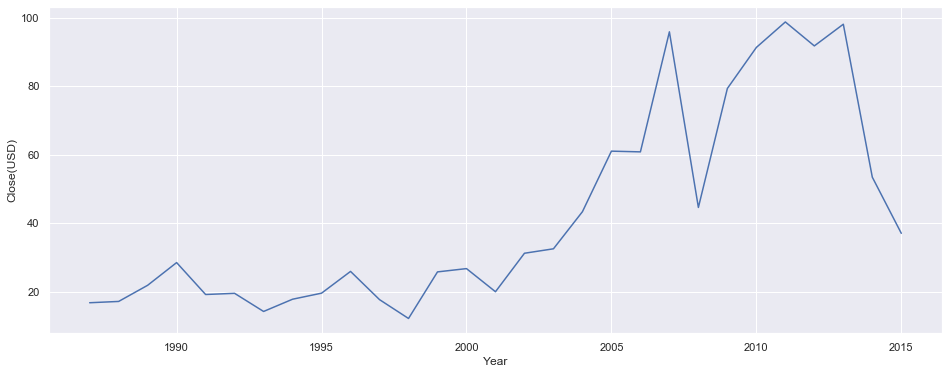

In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Set the width and height of the figure
plt.figure(figsize=(16,6))

sns.lineplot(x="Year",y="Close(USD)",data=df)

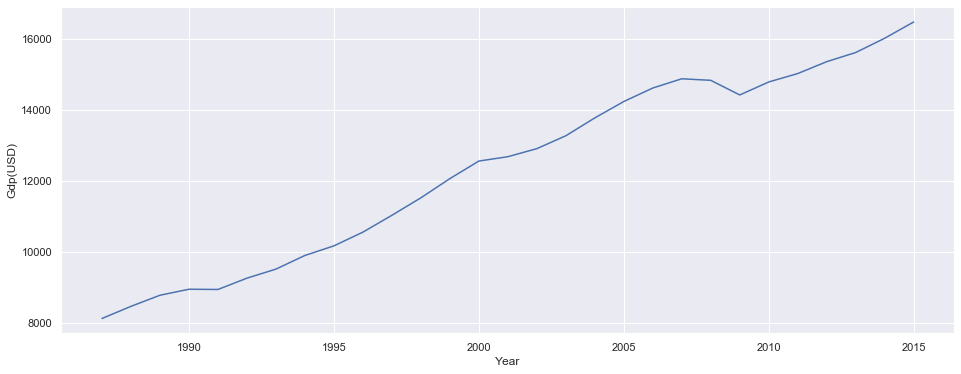

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.lineplot(x="Year", y="Gdp(USD)",data=df)

**Summary of above line charts**

1.From 1990 to 2000, the oil Price is fluctuating while the American gdp is increasing

2.From 2000 to around 2008, both the oil Price and American Gpd are increasing

3.From 2008 to 2010, both the oil Price and American Gpd are decreasing

4.From 2010 to 2015, the oil Price is steady while dropping since 2013 and the American GPD are growing.


### Relationship

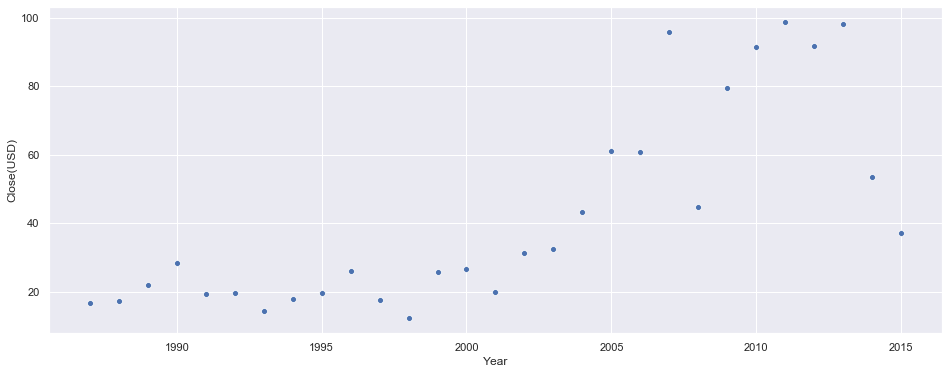

In [10]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['Year'], y=df['Close(USD)'])

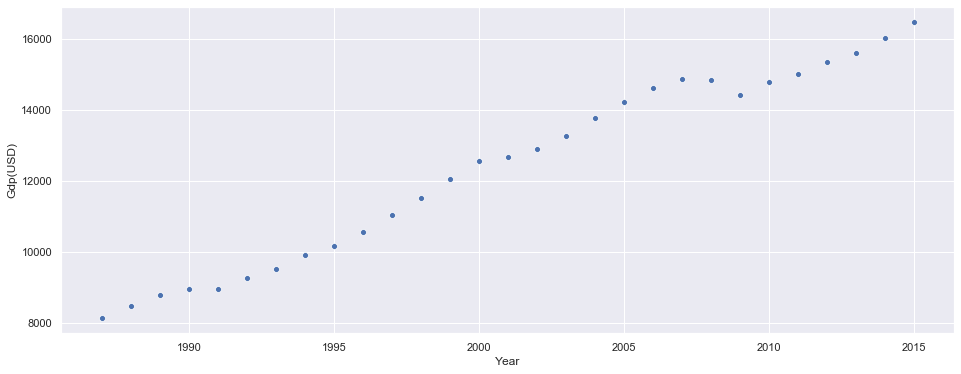

In [11]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['Year'], y=df['Gdp(USD)'])

**Summary of above line charts**

We can find the oil price and American GDP are **positively correlated**

### Distribution

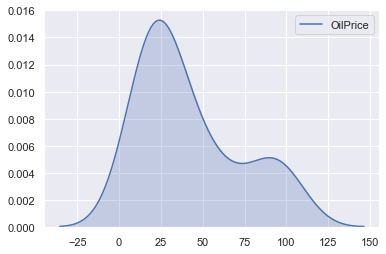

In [12]:
sns.kdeplot(data=df["Close(USD)"], label="OilPrice", shade=True)

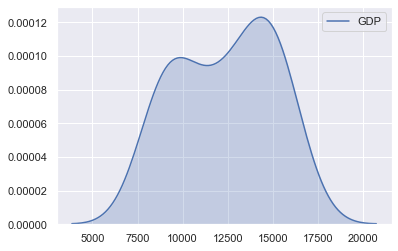

In [13]:
sns.kdeplot(data=df["Gdp(USD)"], label="GDP", shade=True)

**Summary of above kde charts**

1. From the kdeplot, we can find the oilPrice peak at 25 (USD) and around 90 (USD)
2. The American GDP peak at around 10000(USD) and 15000(USD)


### Linear Regression model

**Finally, we try to utilize linear regression algorithm  to predict the American GDP with the help of Year and oil Price**

In [14]:
#import machien learning libraries
from sklearn.linear_model import LinearRegression
data_X = df.loc[:,["Year","Close(USD)"]]
data_y = df.loc[:,"Gdp(USD)"]


In [15]:
#use linearRegression model
model = LinearRegression()

model.fit(data_X, data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Evaluation
model.score(data_X, data_y) 

0.979874097974998

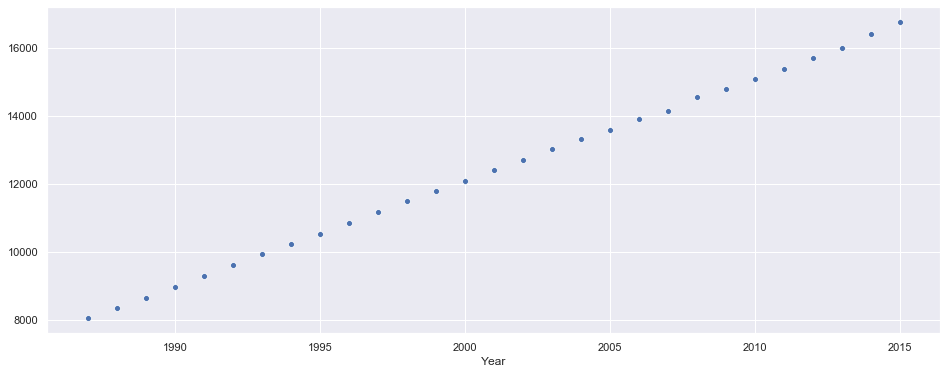

In [17]:
# The prediction Gpd using oilPrice and Year
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['Year'], y=model.predict(data_X[:30]))

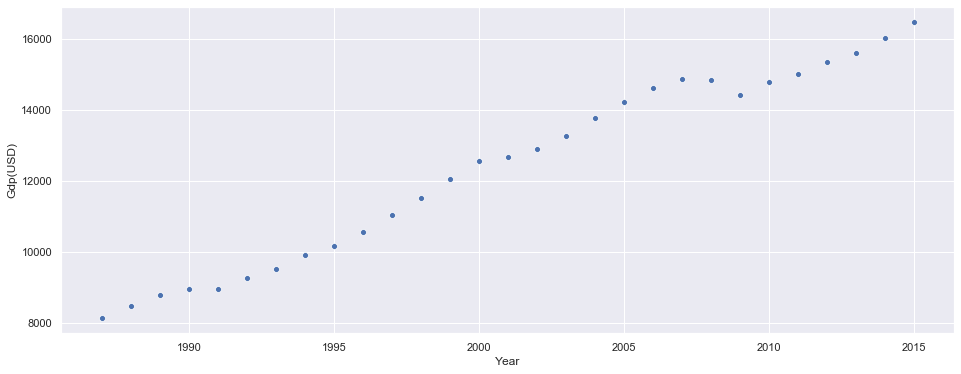

In [18]:
#The real American gdp
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['Year'],y=data_y[:30])

## Overall Summary and Insights


1. The oil Price is highly related with the American GDP

---

2. From the obervation, when the American GDP is increasing the oil Price is also incresing. While the impact has been invalid since 2013.

---

3. From the linear regression, we can use oil price to predict American GDP and the accuracy is very high.

---

4. In the future work, I will find more variables which may influence the oil Price.
